## 라이브러리 및 옵션

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.preprocessing import minmax_scale
import math
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', 100)

## 데이터 불러오기

In [2]:
# 희재
# BASE_PATH = 'C:/Users/sas/Desktop/bigcon/data/2020빅콘테스트 데이터분석분야-퓨쳐스리그_스포츠투아이_제공데이터(.CSV)_시즌별, 시트별 구분'
# 혜원
BASE_PATH='C:/Users/hyewo/Documents/big/2020빅콘테스트 데이터분석분야-퓨쳐스리그_스포츠투아이_제공데이터(.CSV)_시즌별, 시트별 구분'

In [3]:
pitcher16=pd.read_csv(BASE_PATH+'/'+'2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2016.csv',encoding='cp949')
pitcher17=pd.read_csv(BASE_PATH+'/'+'2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2017.csv',encoding='cp949')
pitcher18=pd.read_csv(BASE_PATH+'/'+'2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2018.csv',encoding='cp949')
pitcher19=pd.read_csv(BASE_PATH+'/'+'2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2019.csv',encoding='cp949')
pitcher20=pd.read_csv(BASE_PATH+'/'+'2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2020.csv',encoding='cp949')

pitcher=pd.concat([pitcher16,pitcher17,pitcher18,pitcher19,pitcher20],ignore_index=True)
pitcher.columns = ['게임키', '일자', '팀코드', '상대팀코드', '더블헤더코드', '초말',  '완투_p',  '결과', '홀드_p', '이닝*3_p', '투구수_p', '타자_p', '타수_p', '안타_p', '2루타_p', '3루타_p', '홈런_p', '도루_p', '도루실패_p', '희타_p', '희비_p', '4구_p', '고4_p', '사구_p', '삼진_p', '병살타_p', '폭투_p', '보크_p', '실책_p', '실점_p', '자책점_p', '득점권WHIP_p', '2점차이하WHIP_p', '345번타자WHIP_p']

In [4]:
player16=pd.read_csv(BASE_PATH+'/'+'2020빅콘테스트_스포츠투아이_제공데이터_선수_2016.csv',encoding='cp949')
player17=pd.read_csv(BASE_PATH+'/'+'2020빅콘테스트_스포츠투아이_제공데이터_선수_2017.csv',encoding='cp949')
player18=pd.read_csv(BASE_PATH+'/'+'2020빅콘테스트_스포츠투아이_제공데이터_선수_2018.csv',encoding='cp949')
player19=pd.read_csv(BASE_PATH+'/'+'2020빅콘테스트_스포츠투아이_제공데이터_선수_2019.csv',encoding='cp949')
player20=pd.read_csv(BASE_PATH+'/'+'2020빅콘테스트_스포츠투아이_제공데이터_선수_2020.csv',encoding='cp949')
player=pd.concat([player16,player17,player18,player19,player20],ignore_index=True)
player.columns = ['시즌', '선수코드', '선수명', '팀코드', '포지션', '나이', '연봉']
player['팀코드'] = player['팀코드'].str.upper()

In [5]:
hitter16=pd.read_csv(BASE_PATH+'/'+'2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2016.csv',encoding='cp949')
hitter17=pd.read_csv(BASE_PATH+'/'+'2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2017.csv',encoding='cp949')
hitter18=pd.read_csv(BASE_PATH+'/'+'2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2018.csv',encoding='cp949')
hitter19=pd.read_csv(BASE_PATH+'/'+'2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2019.csv',encoding='cp949')
hitter20=pd.read_csv(BASE_PATH+'/'+'2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2020.csv',encoding='cp949')

hitter=pd.concat([hitter16,hitter17,hitter18,hitter19,hitter20],ignore_index=True)
hitter.columns = ['게임키', '일자', '팀코드', '상대팀코드', '더블헤더코드', '초말', '타자_h', '타수_h', '타점_h', '득점_h', '안타_h', '2루타_h', '3루타_h', '홈런_h', '도루_h', '도루실패_h', '희타_h', '희비_h', '4구_h', '고4_h', '사구_h', '삼진_h', '병살타_h', '실책_h', '잔루_h', '득점권타율_h', '득점권타수_h', '득점권안타_h']

In [6]:
before_WR=pd.read_excel('C:/Users/hyewo/Documents/big/0925/전년승률.xlsx',encoding='cp949')

beforeVsWR15=pd.read_excel('C:/Users/hyewo/Documents/big/0925/2015상대승률.xlsx')
beforeVsWR16=pd.read_excel('C:/Users/hyewo/Documents/big/0925/2016상대승률.xlsx')
beforeVsWR17=pd.read_excel('C:/Users/hyewo/Documents/big/0925/2017상대승률.xlsx')
beforeVsWR18=pd.read_excel('C:/Users/hyewo/Documents/big/0925/2018상대승률.xlsx')
beforeVsWR19=pd.read_excel('C:/Users/hyewo/Documents/big/0925/2019상대승률.xlsx')
before_VSWR=pd.concat([beforeVsWR15,beforeVsWR16,beforeVsWR17,beforeVsWR18,beforeVsWR19],ignore_index=True)

## 데이터셋

In [7]:
#년도 추가하기
def year(c):
    if c['일자'] > 20160000 and c['일자'] < 20170000:
        return 2016
    elif c['일자'] > 20170000 and c['일자'] < 20180000:
        return 2017
    elif c['일자'] > 20180000 and c['일자'] < 20190000:
        return 2018
    elif c['일자'] > 20190000 and c['일자'] < 20200000:
        return 2019
    else:
        return 2020

In [8]:
pitcher['년도']=pitcher.apply(year,axis=1)
hitter['년도']=hitter.apply(year,axis=1)

In [9]:
#피안타율계산
def OAVG(x):
    if x['타수_p']>0:
        return x['안타_p']/x['타수_p']
    elif x['안타_p']==0:
        return 0
    else:
        return 99.9
    
#평균자책점
def ERA(x):
    if(x['이닝*3_p']>0):
        return x['자책점_p']/(x['이닝*3_p']/3)*9
    elif x['자책점_p']==0:
        return 0
    else:
        return 99.9

#WHIP=안타+4구/이닝수
#고의사구 포함
#사구는 제외
def WHIP(x):
    H = x['안타_p']+x['2루타_p']+x['3루타_p']+x['홈런_p']
    B=x['4구_p']+x['고4_p']
    HB=H+B
    if(x['이닝*3_p']>0):
        return HB/x['이닝*3_p']
    elif HB==0:
        return 0
    else:
        return 99.9
    
#RA9 = 실점/이닝수*9
#비자책과 자책 구분하지 않은 평균 실점
def RA9(x):
    if(x['이닝*3_p']>0):
        return x['실점_p']/(x['이닝*3_p']/3)*9
    elif x['실점_p']==0:
        return 0
    else:
        return 99.9
    
#K_B = 삼진 / 볼넷
#이게 우수한 타자가 ERA도 우수할 가능성이 높다
def K_B(x):
    if x['4구_p']>0:
        return x['삼진_p']/x['4구_p']
    elif x['삼진_p']==0:
        return 0
    else:
        return 99.9
    
#볼넷/이닝
def BALL(x):
    if(x['이닝*3_p']>0):
        return x['4구_p']/(x['이닝*3_p']/3)*9
    elif x['4구_p']==0:
        return 0
    else:
        return 99.9
    
#삼진/이닝
def KKK(x):
    if(x['이닝*3_p']>0):
        return x['삼진_p']/(x['이닝*3_p']/3)*9
    elif x['삼진_p']==0:
        return 0
    else:
        return 99.9
    
#피홈런/이닝
def HR(x):
    if(x['이닝*3_p']>0):
        return x['홈런_p']/(x['이닝*3_p']/3)*9
    elif x['홈런_p']==0:
        return 0
    else:
        return 99.9
    
#타자/이닝
def HITTER(x):
    if(x['이닝*3_p']>0):
        return x['타자_p']/(x['이닝*3_p']/3)*9
    elif x['타자_p']==0:
        return 0
    else:
        return 99.9
    
pitcher['피안타율_p']=pitcher.apply(OAVG,axis=1)
pitcher['평균자책점_p']=pitcher.apply(ERA,axis=1)
pitcher['실점/이닝_p']=pitcher.apply(RA9,axis=1)
pitcher['삼진/이닝_p']=pitcher.apply(KKK,axis=1)
pitcher['볼넷/이닝_p']=pitcher.apply(BALL,axis=1)
pitcher['삼진/볼넷_p']=pitcher.apply(K_B,axis=1)
pitcher['피홈런/이닝_p']=pitcher.apply(HR,axis=1)
pitcher['타자/이닝_p']=pitcher.apply(HITTER,axis=1)
pitcher['WHIP_p']=pitcher.apply(WHIP,axis=1)

In [10]:
pitcher=pitcher.drop(['완투_p','홀드_p','이닝*3_p','타자_p','타수_p','안타_p','2루타_p','3루타_p','홈런_p','도루_p','도루실패_p','희타_p','희비_p','4구_p','고4_p','사구_p','삼진_p','병살타_p','폭투_p','보크_p','실책_p','실점_p','자책점_p'],axis=1)

In [11]:
pitcher

,게임키,일자,팀코드,상대팀코드,더블헤더코드,초말,결과,투구수_p,득점권WHIP_p,2점차이하WHIP_p,345번타자WHIP_p,년도,피안타율_p,평균자책점_p,실점/이닝_p,삼진/이닝_p,볼넷/이닝_p,삼진/볼넷_p,피홈런/이닝_p,타자/이닝_p,WHIP_p
0,20160401HHLG0,20160401,LG,HH,0,B,W,184,0.642857,1.285714,2.400000,2016,0.282609,3.000000,3.000000,7.500000,2.250000,3.333333,0.000000,39.000000,0.500000
1,20160401HHLG0,20160401,HH,LG,0,T,L,196,1.500000,1.000000,0.750000,2016,0.214286,3.176471,3.970588,8.735294,3.176471,2.750000,0.794118,37.323529,0.470588
2,20160401HTNC0,20160401,NC,HT,0,B,W,143,1.333333,1.038462,2.142857,2016,0.235294,4.000000,4.000000,10.000000,3.000000,3.333333,1.000000,38.000000,0.555556
3,20160401HTNC0,20160401,HT,NC,0,T,L,147,0.500000,1.695652,1.875000,2016,0.300000,5.625000,5.625000,10.125000,5.625000,1.800000,2.250000,40.500000,0.750000
4,20160401KTSK0,20160401,SK,KT,0,B,L,151,1.000000,2.357143,2.250000,2016,0.305556,8.000000,8.000000,7.000000,4.000000,1.750000,2.000000,42.000000,0.629630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,20200719LTSS0,20200719,LT,SS,0,T,W,155,0.600000,1.111111,1.500000,2020,0.225806,1.000000,1.000000,9.000000,3.000000,3.000000,1.000000,34.000000,0.407407
6396,20200719OBHT0,20200719,HT,OB,0,B,L,137,2.142857,1.800000,0.750000,2020,0.297297,8.000000,8.000000,4.000000,2.000000,2.000000,1.000000,41.000000,0.666667
6397,20200719OBHT0,20200719,OB,HT,0,T,W,177,3.000000,1.000000,1.875000,2020,0.250000,4.000000,4.000000,5.000000,6.000000,0.833333,0.000000,38.000000,0.555556
6398,20200719WOSK0,20200719,SK,WO,0,B,W,134,1.500000,1.105263,2.142857,2020,0.212121,3.000000,3.000000,4.000000,3.000000,1.333333,1.000000,37.000000,0.407407


In [12]:
hitter

,게임키,일자,팀코드,상대팀코드,더블헤더코드,초말,타자_h,타수_h,타점_h,득점_h,안타_h,2루타_h,3루타_h,홈런_h,도루_h,도루실패_h,희타_h,희비_h,4구_h,고4_h,사구_h,삼진_h,병살타_h,실책_h,잔루_h,득점권타율_h,득점권타수_h,득점권안타_h,년도
0,20160401HHLG0,20160401,LG,HH,0,B,47,42,4,5,9,2,0,1,2,1,1,0,4,0,0,11,0,0,8,0.333333,12,4,2016
1,20160401HHLG0,20160401,HH,LG,0,T,52,46,4,4,13,2,0,0,0,0,3,0,3,0,0,10,1,2,12,0.200000,15,3,2016
2,20160401HTNC0,20160401,NC,HT,0,B,36,30,5,5,9,2,0,2,0,0,1,0,5,0,0,9,1,1,7,0.142857,7,1,2016
3,20160401HTNC0,20160401,HT,NC,0,T,38,34,3,4,8,3,0,1,0,0,0,0,3,0,1,10,1,0,7,0.100000,10,1,2016
4,20160401KTSK0,20160401,SK,KT,0,B,36,36,4,4,10,5,0,1,0,0,0,0,0,0,0,7,1,1,5,0.375000,8,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,20200719LTSS0,20200719,LT,SS,0,T,31,29,2,2,6,1,0,1,0,0,1,0,1,0,0,7,3,0,2,0.000000,2,0,2020
6396,20200719OBHT0,20200719,HT,OB,0,B,38,32,4,4,8,0,1,0,0,0,0,0,6,0,0,5,1,0,7,0.571429,7,4,2020
6397,20200719OBHT0,20200719,OB,HT,0,T,41,37,8,8,11,3,0,1,2,1,0,0,2,1,2,4,0,0,6,0.363636,11,4,2020
6398,20200719WOSK0,20200719,SK,WO,0,B,37,30,3,4,6,0,0,0,0,0,0,0,7,0,0,10,0,0,9,0.250000,8,2,2020


In [13]:
#출루율
def chulru(x):
    if((x['타수_h']+x['사구_h']+x['4구_h'])>0):
        return (x['안타_h']+x['사구_h']+x['4구_h'])/(x['타수_h']+x['사구_h']+x['4구_h'])
    elif (x['타수_h']+x['사구_h']+x['4구_h'])==0:
        return 0
    else:
        return 99.9
    
#장타율
def jangta(x):
    if(x['타수_h']>0):
        return (x['안타_h']+x['2루타_h']+x['3루타_h']*2+x['홈런_h']*3)/x['타수_h']
    elif x['타수_h']==0:
        return 0
    else:
        return 99.9
        
#타율
def ta(x):
    if(x['타수_h']>0):
        return x['안타_h']/x['타수_h']
    elif x['타수_h']==0:
        return 0
    else:
        return 99.9
    
#사구/타수
def sagu(x):
    if(x['타수_h']>0):
        return (x['사구_h']+x['4구_h'])/x['타수_h']
    elif x['타수_h']==0:
        return 0
    else:
        return 99.9
    
#삼진/타수
def samjin(x):
    if(x['타수_h']>0):
        return x['삼진_h']/x['타수_h']
    elif x['타수_h']==0:
        return 0
    else:
        return 99.9
    
hitter['출루율_h']=hitter.apply(chulru,axis=1)
hitter['장타율_h']=hitter.apply(jangta,axis=1)
hitter['타율_h']=hitter.apply(ta,axis=1)
hitter['사구/타수_h']=hitter.apply(sagu,axis=1)
hitter['삼진/타수_h']=hitter.apply(samjin,axis=1)

In [14]:
hitter=hitter.drop(['타자_h', '타수_h', '타점_h', '득점_h', '안타_h', '2루타_h', '3루타_h', '홈런_h', '도루_h', '도루실패_h', '희타_h', '희비_h', '4구_h', '고4_h', '사구_h', '삼진_h', '병살타_h', '실책_h', '잔루_h'],axis=1)

In [15]:
hitter

,게임키,일자,팀코드,상대팀코드,더블헤더코드,초말,득점권타율_h,득점권타수_h,득점권안타_h,년도,출루율_h,장타율_h,타율_h,사구/타수_h,삼진/타수_h
0,20160401HHLG0,20160401,LG,HH,0,B,0.333333,12,4,2016,0.282609,0.333333,0.214286,0.095238,0.261905
1,20160401HHLG0,20160401,HH,LG,0,T,0.200000,15,3,2016,0.326531,0.326087,0.282609,0.065217,0.217391
2,20160401HTNC0,20160401,NC,HT,0,B,0.142857,7,1,2016,0.400000,0.566667,0.300000,0.166667,0.300000
3,20160401HTNC0,20160401,HT,NC,0,T,0.100000,10,1,2016,0.315789,0.411765,0.235294,0.117647,0.294118
4,20160401KTSK0,20160401,SK,KT,0,B,0.375000,8,3,2016,0.277778,0.500000,0.277778,0.000000,0.194444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,20200719LTSS0,20200719,LT,SS,0,T,0.000000,2,0,2020,0.233333,0.344828,0.206897,0.034483,0.241379
6396,20200719OBHT0,20200719,HT,OB,0,B,0.571429,7,4,2020,0.368421,0.312500,0.250000,0.187500,0.156250
6397,20200719OBHT0,20200719,OB,HT,0,T,0.363636,11,4,2020,0.365854,0.459459,0.297297,0.108108,0.108108
6398,20200719WOSK0,20200719,SK,WO,0,B,0.250000,8,2,2020,0.351351,0.200000,0.200000,0.233333,0.333333


팀타자 데이터셋 + 팀투수 데이터셋 + 승률데이터셋

In [16]:
DATA=pd.merge(pitcher,hitter,left_on=['게임키','일자','초말','팀코드','상대팀코드','더블헤더코드','년도'],right_on=['게임키','일자','초말','팀코드','상대팀코드','더블헤더코드','년도'],how='left')

In [17]:
before_WR['년도']=before_WR['년도']+1
DATA=pd.merge(DATA,before_WR,left_on=['팀코드','년도'],right_on=['팀코드','년도'],how='left')
DATA.rename(columns={'승률':'전년도승률'},inplace=True)

before_VSWR.rename(columns={'시즌':'년도'},inplace=True)
before_VSWR['년도']=before_VSWR['년도']+1
DATA=pd.merge(DATA,before_VSWR,left_on=['팀코드','상대팀코드','년도'],right_on=['팀코드','상대팀코드','년도'],how='left')
DATA.rename(columns={'상대승률':'전년도상대승률'},inplace=True)

In [18]:
#시즌 생성 ( 올스타전 날짜 기준)
def season(x):
    if (x['일자'] > 20160000 and x['일자'] < 20160714) or (x['일자'] > 20170000 and x['일자'] < 20170713) or (x['일자'] > 20180000 and x['일자'] < 20180712) or (x['일자'] > 20190000 and x['일자'] < 20190718) or (x['일자'] > 20200000 and x['일자'] < 20200720):
        return '상'
    else:
        return '하'
    
DATA['상/하']=DATA.apply(season,axis=1)

In [19]:
def home(x):
    if x['초말']=='B':
        return 1
    else:
        return 0
    
def OBS(x):
    return (x['팀코드']+x['상대팀코드']+str(x['년도'])+x['상/하'])

DATA['초말']=DATA.apply(home,axis=1)
DATA.rename(columns={'초말':'홈팀'},inplace=True)
DATA['OBS']=DATA.apply(OBS,axis=1)

### Y만들기

In [20]:
def target(x):
        t = pd.DataFrame(x.groupby('결과').count()['게임키'])
        return  t['게임키'][-1 ] / ( t['게임키'][-1] + t['게임키'][-2] )

In [21]:
teams = ['HT','OB','LT','NC','SK','LG','WO','HH','SS','KT']
years = [2016,2017,2018,2019]
seasons = ['상','하']

result = []

for team in teams:
    for year in years:
        for season in seasons:
            if season == '상':
                tys = DATA[(DATA['팀코드']==team)&(DATA['년도']==year)&(DATA['상/하']=='하')]
            else:
                tys = DATA[(DATA['팀코드']==team)&(DATA['년도']==year+1)&(DATA['상/하']=='상')]
            result.append(target(tys))


In [22]:
result = pd.DataFrame(result)
result.rename(columns={0:'result'},inplace=True)

In [23]:
teams = ['HT','OB','LT','NC','SK','LG','WO','HH','SS','KT']
years = [2016,2017,2018,2019]
seasons = ['상','하']

obs = []

for team in teams:
    for year in years:
        for season in seasons:
            obs.append(team+str(year)+season)

In [24]:
obs = pd.DataFrame(obs)
obs.rename(columns={0:'obs'},inplace=True)

In [25]:
TARGET = pd.concat([obs,result],axis=1)

## DATA랑 TARGET합치기

In [26]:
def obs(x):
    return (x['팀코드']+str(x['년도'])+x['상/하'])

DATA['obs']=DATA.apply(obs,axis=1)

In [27]:
FINAL = pd.merge(DATA,TARGET,left_on=['obs'],right_on=['obs'],how='left')

## DATA에서 2016~2019 데이터만 가져와서 학습시킬것이므로..! 

In [28]:
DATAT = FINAL[FINAL['년도']!=2020]

피벗테이블로 만들기 전에 더블헤더코드랑 홈팀 변수 제거해주기

In [29]:
DATAT=DATAT.drop(['더블헤더코드','홈팀'],axis=1)

In [30]:
DATAT

,게임키,일자,팀코드,상대팀코드,결과,투구수_p,득점권WHIP_p,2점차이하WHIP_p,345번타자WHIP_p,년도,피안타율_p,평균자책점_p,실점/이닝_p,삼진/이닝_p,볼넷/이닝_p,삼진/볼넷_p,피홈런/이닝_p,타자/이닝_p,WHIP_p,득점권타율_h,득점권타수_h,득점권안타_h,출루율_h,장타율_h,타율_h,사구/타수_h,삼진/타수_h,전년도승률,전년도상대승률,상/하,OBS,obs,result
0,20160401HHLG0,20160401,LG,HH,W,184,0.642857,1.285714,2.400000,2016,0.282609,3.000000,3.000000,7.500000,2.250000,3.333333,0.000000,39.000000,0.500000,0.333333,12,4,0.282609,0.333333,0.214286,0.095238,0.261905,0.451,0.4375,상,LGHH2016상,LG2016상,0.578125
1,20160401HHLG0,20160401,HH,LG,L,196,1.500000,1.000000,0.750000,2016,0.214286,3.176471,3.970588,8.735294,3.176471,2.750000,0.794118,37.323529,0.470588,0.200000,15,3,0.326531,0.326087,0.282609,0.065217,0.217391,0.472,0.5625,상,HHLG2016상,HH2016상,0.515625
2,20160401HTNC0,20160401,NC,HT,W,143,1.333333,1.038462,2.142857,2016,0.235294,4.000000,4.000000,10.000000,3.000000,3.333333,1.000000,38.000000,0.555556,0.142857,7,1,0.400000,0.566667,0.300000,0.166667,0.300000,0.596,0.6875,상,NCHT2016상,NC2016상,0.552239
3,20160401HTNC0,20160401,HT,NC,L,147,0.500000,1.695652,1.875000,2016,0.300000,5.625000,5.625000,10.125000,5.625000,1.800000,2.250000,40.500000,0.750000,0.100000,10,1,0.315789,0.411765,0.235294,0.117647,0.294118,0.465,0.3125,상,HTNC2016상,HT2016상,0.516129
4,20160401KTSK0,20160401,SK,KT,L,151,1.000000,2.357143,2.250000,2016,0.305556,8.000000,8.000000,7.000000,4.000000,1.750000,2.000000,42.000000,0.629630,0.375000,8,3,0.277778,0.500000,0.277778,0.000000,0.194444,0.486,0.5625,상,SKKT2016상,SK2016상,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,20190930SKHH0,20190930,SK,HH,W,123,0.000000,1.000000,0.600000,2019,0.272727,2.000000,2.000000,5.000000,0.000000,99.900000,1.000000,35.000000,0.444444,0.400000,10,4,0.384615,0.393939,0.272727,0.181818,0.272727,0.545,0.6875,하,SKHH2019하,SK2019하,0.323077
5756,20191001NCOB0,20191001,OB,NC,W,164,1.250000,2.192308,2.000000,2019,0.395349,5.000000,5.000000,7.000000,2.000000,3.500000,0.000000,45.000000,0.777778,0.266667,15,4,0.390244,0.450000,0.375000,0.025000,0.150000,0.646,0.7500,하,OBNC2019하,OB2019하,0.593750
5757,20191001NCOB0,20191001,NC,OB,L,150,1.363636,1.695652,1.500000,2019,0.375000,5.400000,6.480000,6.480000,1.080000,6.000000,0.000000,45.360000,0.720000,0.250000,16,4,0.422222,0.441860,0.395349,0.046512,0.162791,0.406,0.2500,하,NCOB2019하,NC2019하,0.688525
5758,20191001WOLT0,20191001,LT,WO,L,136,1.333333,1.222222,0.545455,2019,0.228571,1.000000,3.000000,9.000000,3.000000,3.000000,0.000000,38.000000,0.518519,0.166667,6,1,0.270270,0.250000,0.250000,0.027778,0.222222,0.479,0.5625,하,LTWO2019하,LT2019하,0.483871


In [31]:
X = pd.pivot_table(DATAT,index='OBS')

In [32]:
X = X.drop(['년도','일자'],axis=1)

In [33]:
SET = X.reset_index(drop=False,inplace=False)

In [34]:
SET

,OBS,2점차이하WHIP_p,345번타자WHIP_p,WHIP_p,result,득점권WHIP_p,득점권안타_h,득점권타수_h,득점권타율_h,볼넷/이닝_p,사구/타수_h,삼진/볼넷_p,삼진/이닝_p,삼진/타수_h,실점/이닝_p,장타율_h,전년도상대승률,전년도승률,출루율_h,타율_h,타자/이닝_p,투구수_p,평균자책점_p,피안타율_p,피홈런/이닝_p
0,HHHT2016상,1.529217,2.102679,0.564289,0.515625,2.187500,1.875000,8.250000,0.189435,4.409091,0.127176,1.826389,7.017045,0.216352,5.517045,0.338340,0.4375,0.472,0.331733,0.251536,40.024148,152.375000,4.735795,0.244511,0.899148
1,HHHT2016하,1.366256,1.772416,0.573486,0.421687,1.511458,3.375000,12.000000,0.262665,3.791346,0.130624,14.643750,7.621635,0.210905,4.938702,0.361869,0.4375,0.472,0.368437,0.288795,39.641346,157.750000,4.688702,0.265597,0.901683
2,HHHT2017상,2.327967,2.185227,0.712384,0.440678,2.115625,2.000000,7.875000,0.263969,4.484375,0.071638,13.591667,5.156250,0.158817,6.968750,0.372769,0.4375,0.468,0.322940,0.273844,41.953125,146.000000,6.468750,0.300022,1.078125
3,HHHT2017하,1.528199,1.361607,0.557292,0.579545,1.912757,3.000000,8.875000,0.259244,2.546875,0.088749,14.487500,5.781250,0.161013,4.890625,0.445988,0.4375,0.468,0.361656,0.307593,38.843750,140.500000,4.375000,0.279349,0.781250
4,HHHT2018상,1.344823,1.302557,0.494213,0.464286,1.049290,3.125000,9.375000,0.256818,2.328125,0.097279,14.810417,7.062500,0.236801,4.109375,0.413663,0.3125,0.430,0.334374,0.273605,37.703125,137.250000,3.687500,0.255494,0.515625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,WOSS2017하,1.921644,2.478231,0.675926,0.505495,1.534014,3.714286,12.857143,0.282509,2.214286,0.136518,4.250000,6.946429,0.213372,5.178571,0.528654,0.5000,0.538,0.429136,0.353997,41.875000,154.857143,4.107143,0.308717,1.035714
716,WOSS2018상,1.211496,1.544272,0.564394,0.547170,0.864760,3.363636,12.000000,0.253251,2.579545,0.117955,20.520779,6.738636,0.214294,4.159091,0.455536,0.6875,0.486,0.374531,0.303535,39.465909,152.181818,3.875000,0.281556,0.761364
717,WOSS2018하,4.336389,2.291667,0.743519,0.597938,1.875000,3.400000,12.000000,0.297803,3.275000,0.104804,3.070000,7.200000,0.242342,7.500000,0.461460,0.6875,0.486,0.370310,0.307521,42.500000,155.600000,6.650000,0.334829,2.300000
718,WOSS2019상,1.079556,1.779024,0.507657,0.608696,1.508953,3.636364,11.000000,0.312594,2.361296,0.125672,3.583333,7.496842,0.167275,3.796244,0.461005,0.6875,0.521,0.380415,0.303094,37.551461,140.909091,3.500790,0.238692,0.560315


## HH

## 1) 다중 선형 회귀

* 팀별로 SET 데이터셋 나눠서 적용하기 
* 상대팀 고려안하고 10개 팀으로 나눠서 적용해보기. 즉 회귀식 10개

In [35]:
HHset=SET[SET['OBS'].str.startswith(pat='HH')]
HH=HHset.drop(['OBS'],axis=1)
HH_X=HH.drop(['result'],axis=1)
HH_Y=HH['result']

### step1,  모형진단
   
   1) Y(result) : 선형성, 등분산성, 정규성 파악

In [36]:
regressor=LinearRegression()
regressor.fit(HH_X,HH_Y)

LinearRegression()

In [37]:
HH_Y_pred=regressor.predict(HH_X)

In [38]:
residual=HH_Y - HH_Y_pred

#### 모형의 선형성

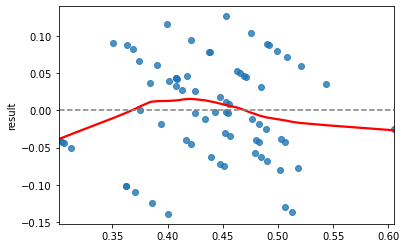

In [39]:
sns.regplot(HH_Y_pred,residual,lowess=True, line_kws={'color':'red'})
plt.plot([HH_Y_pred.min(),HH_Y_pred.max()],[0,0],'--',color='grey')

- 선형성에 문제가 있어 보임

#### 잔차의 정규성

In [40]:
sr=scipy.stats.zscore(residual)
(x,y),_=scipy.stats.probplot(sr)

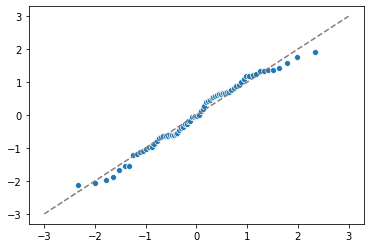

In [41]:
sns.scatterplot(x,y)
plt.plot([-3,3],[-3,3],'--',color='grey')

In [42]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.9752444624900818, pvalue=0.1667131781578064)

- p-value값이 0.16이므로 유의수준 5%에서 잔차의 정규성을 만족한다.

#### 잔차의 등분산성

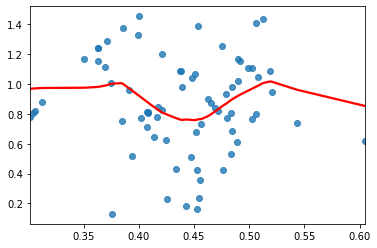

In [43]:
sns.regplot(HH_Y_pred,np.sqrt(np.abs(sr)),lowess=True,line_kws={'color':'red'})

In [44]:
scipy.stats.levene(HH_Y_pred,np.sqrt(np.abs(sr)))

LeveneResult(statistic=73.87626559870287, pvalue=1.368321483986609e-14)

- p-value값이 0.05보다 작으므로 등분산성을 만족하지 못한다고 할 수 있다.

### step2, 변수변환
   
   1) Y(result)
   
    BOXCOX사용

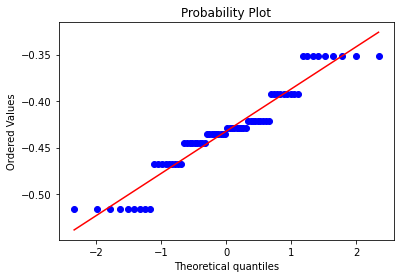

In [45]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
x_trans,optimal_lambda=scipy.stats.boxcox(HH_Y)
scipy.stats.probplot(x_trans,dist=scipy.stats.norm,plot=ax)
plt.show()

In [46]:
print(optimal_lambda)

1.752306598851396


- 1.7승 => 제곱

In [47]:
HH_Y_2=HH_Y**2

    y가 0과1사이일때는 sin^-1(root(Y))

In [48]:
HH_Y_sin=np.sin(np.sqrt(HH_Y))**(-1)

   2) 설명변수 : minmax, log(x+1), root(x)

In [49]:
HH_X.describe()

,2점차이하WHIP_p,345번타자WHIP_p,WHIP_p,득점권WHIP_p,득점권안타_h,득점권타수_h,득점권타율_h,볼넷/이닝_p,사구/타수_h,삼진/볼넷_p,삼진/이닝_p,삼진/타수_h,실점/이닝_p,장타율_h,전년도상대승률,전년도승률,출루율_h,타율_h,타자/이닝_p,투구수_p,평균자책점_p,피안타율_p,피홈런/이닝_p
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,1.896453,1.938357,0.629749,1.803530,2.580627,9.112162,0.264003,3.662274,0.107832,8.684637,6.943562,0.210824,5.772908,0.402492,0.477315,0.476250,0.339918,0.271721,40.498492,154.816809,5.269921,0.282526,1.054925
std,0.668166,0.404498,0.105772,0.626515,0.743128,1.498246,0.058848,1.056241,0.027039,9.457532,1.175503,0.032977,1.603962,0.060821,0.122484,0.037936,0.035197,0.030994,2.067484,10.817846,1.550269,0.032920,0.468497
min,1.027778,1.020833,0.359954,0.711458,1.000000,5.500000,0.130736,1.093750,0.035512,1.153628,4.625000,0.153013,2.525000,0.241720,0.250000,0.430000,0.258041,0.180315,36.000000,119.000000,2.300000,0.212722,0.000000
25%,1.444396,1.683994,0.557974,1.467597,2.104167,8.187500,0.231143,2.929241,0.089272,2.158333,6.222956,0.185753,4.762320,0.358206,0.393750,0.458500,0.316229,0.254132,39.122396,147.145833,4.343614,0.259059,0.781250
50%,1.680167,1.934835,0.611863,1.707501,2.527778,9.401786,0.264290,3.612179,0.107435,3.452381,6.929803,0.211159,5.720465,0.407607,0.466667,0.470000,0.346036,0.273154,40.484722,155.250000,5.307984,0.282851,1.046234
75%,2.184998,2.207224,0.679738,2.124847,3.102778,10.025000,0.305885,4.376539,0.125571,14.526563,7.431851,0.233449,6.490402,0.446117,0.562500,0.487750,0.368609,0.290797,41.375000,162.198864,5.975000,0.297753,1.263281
max,4.071625,3.018939,0.907092,4.843750,4.000000,12.000000,0.396212,6.125000,0.169296,52.616667,10.666667,0.299797,9.718750,0.589922,0.750000,0.535000,0.407256,0.357033,45.000000,175.200000,9.060096,0.366470,2.454167


- 삼진/볼넷_p에서 min과 max의 차이가 커 변수변환을 해주기로 함. 

In [50]:
HH['삼진/볼넷_p']=minmax_scale(HH['삼진/볼넷_p'])
HH_X=HH.drop(['result'],axis=1)

변수변환한 걸로 회귀시켜 등분산성 및 선형성 다시 확인

- 그냥 Y

LeveneResult(statistic=73.87626559870213, pvalue=1.3683214839869409e-14)

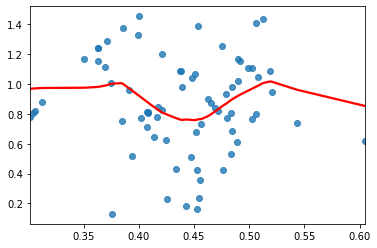

In [51]:
regressor=LinearRegression()
regressor.fit(HH_X,HH_Y)

HH_Y_pred=regressor.predict(HH_X)

residual=HH_Y - HH_Y_pred

sr=scipy.stats.zscore(residual)

sns.regplot(HH_Y_pred,np.sqrt(np.abs(sr)),lowess=True,line_kws={'color':'red'})

scipy.stats.levene(HH_Y_pred,np.sqrt(np.abs(sr)))

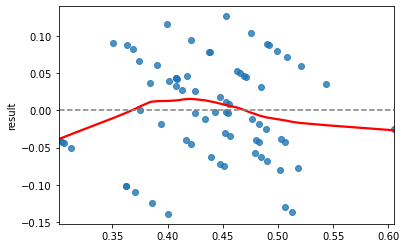

In [52]:
sns.regplot(HH_Y_pred,residual,lowess=True, line_kws={'color':'red'})
plt.plot([HH_Y_pred.min(),HH_Y_pred.max()],[0,0],'--',color='grey')

- y제곱

LeveneResult(statistic=102.42557464609824, pvalue=1.8360079892216764e-18)

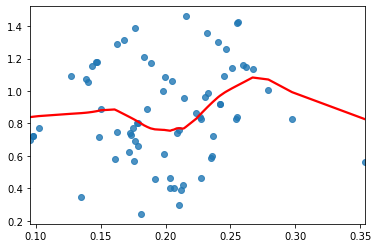

In [53]:
regressor=LinearRegression()
regressor.fit(HH_X,HH_Y_2)

HH_Y_2_pred=regressor.predict(HH_X)

residual=HH_Y_2 - HH_Y_2_pred

sr=scipy.stats.zscore(residual)

sns.regplot(HH_Y_2_pred,np.sqrt(np.abs(sr)),lowess=True,line_kws={'color':'red'})

scipy.stats.levene(HH_Y_2_pred,np.sqrt(np.abs(sr)))

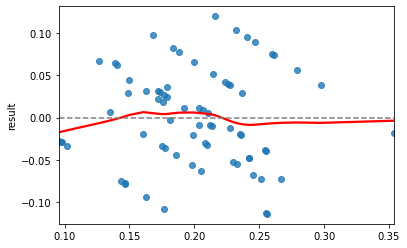

In [54]:
sns.regplot(HH_Y_2_pred,residual,lowess=True, line_kws={'color':'red'})
plt.plot([HH_Y_2_pred.min(),HH_Y_2_pred.max()],[0,0],'--',color='grey')

- sin

LeveneResult(statistic=43.435044150769, pvalue=7.974426153068271e-10)

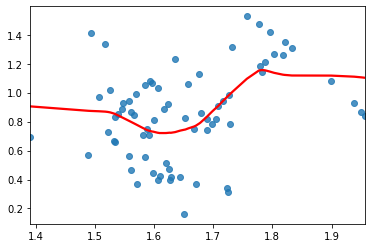

In [55]:
regressor=LinearRegression()
regressor.fit(HH_X,HH_Y_sin)

HH_Y_sin_pred=regressor.predict(HH_X)

residual=HH_Y_sin - HH_Y_sin_pred

sr=scipy.stats.zscore(residual)

sns.regplot(HH_Y_sin_pred,np.sqrt(np.abs(sr)),lowess=True,line_kws={'color':'red'})

scipy.stats.levene(HH_Y_sin_pred,np.sqrt(np.abs(sr)))

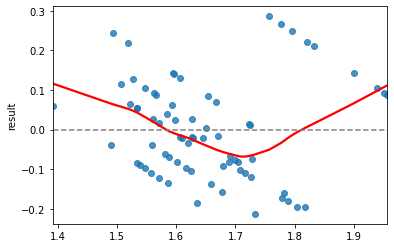

In [56]:
sns.regplot(HH_Y_sin_pred,residual,lowess=True, line_kws={'color':'red'})
plt.plot([HH_Y_sin_pred.min(),HH_Y_sin_pred.max()],[0,0],'--',color='grey')

- sin적용한게 아주 조금 나아져서 이걸 사용해볼게

step3,  다중공선성

In [57]:
y,X=dmatrices('HH_Y_sin~HH_X',return_type='dataframe')
HHvif = pd.DataFrame()
HHvif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
HHvif["features"] = X.columns 
HHvif

,VIF Factor,features
0,5042.312525,Intercept
1,2.083403,HH_X[0]
2,2.666214,HH_X[1]
3,37.971124,HH_X[2]
4,2.739460,HH_X[3]
5,13.589518,HH_X[4]
6,7.076855,HH_X[5]
7,5.730505,HH_X[6]
8,5.726341,HH_X[7]
9,113.082569,HH_X[8]


30이상인거 drop하기

In [58]:
HHdeleteindex=HHvif[HHvif['VIF Factor']>30].index-1

In [59]:
HHdeletecol=HHdeleteindex[1:]

In [60]:
HH_X=HH_X.drop(HH_X.columns[HHdeletecol],axis=1)

### step4,  최종모형결정 
-> stepwise 사용

In [61]:
#https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f
def stepwise_selection(data, target,SL_in=0.1,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features,dtype='float64')
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [62]:
stepwise_selection(HH_X,HH_Y_sin)

['전년도승률', '득점권WHIP_p']

-> forward 사용

In [63]:
#https://planspace.org/20150423-forward_selection_with_statsmodels/

import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [64]:
HH_X.rename(columns={'2점차이하WHIP_p':'A',
                     '345번타자WHIP_p':'B',
                     'WHIP_p':'C',
                     '득점권WHIP_p':'D',
                     '득점권안타_h':'E',
                     '득점권타수_h':'F',
                     '득점권타율_h':'G',
                     '볼넷/이닝_p':'H',
                     '사구/타수_h':'I',
                     '삼진/볼넷_p':'J',
                     '삼진/이닝_p':'K',
                     '삼진/타수_h':'L',
                     '실점/이닝_p':'M',
                     '장타율_h':'N',
                     '전년도상대승률':'O',
                     '전년도승률':'P',
                     '출루율_h':'Q',
                     '타율_h':'R',
                     '타자/이닝_p':'S',
                     '투구수_p':'T',
                     '평균자책점_p':'U',
                     '피안타율_p':'V',
                     '피홈런/이닝_p':'W',},inplace=True)

In [65]:
forHH=pd.concat([HH_X,HH_Y_sin],axis=1)

In [66]:
model=forward_selected(forHH,'result')
print (model.model.formula)
print (model.rsquared_adj)

result ~ P + D + G + N + L + K + 1
0.24763078807665828


In [67]:
HH_X.rename(columns={'A':'2점차이하WHIP_p',
                     'B':'345번타자WHIP_p',
                     'C':'WHIP_p',
                     'D':'득점권WHIP_p',
                     'E':'득점권안타_h',
                     'F':'득점권타수_h',
                     'G':'득점권타율_h',
                     'H':'볼넷/이닝_p',
                     'I':'사구/타수_h',
                     'J':'삼진/볼넷_p',
                     'K':'삼진/이닝_p',
                     'L':'삼진/타수_h',
                     'M':'실점/이닝_p',
                     'N':'장타율_h',
                     'O':'전년도상대승률',
                     'P':'전년도승률',
                     'Q':'출루율_h',
                     'R':'타율_h',
                     'S':'타자/이닝_p',
                     'T':'투구수_p',
                     'U':'평균자책점_p',
                     'V':'피안타율_p',
                     'W':'피홈런/이닝_p'},inplace=True)

### step5
model결정 후에 step1이랑 3 다시해보고 확인해보기 

In [68]:
forHH=HH_X[['전년도승률','득점권WHIP_p','득점권타율_h','장타율_h','삼진/타수_h','삼진/이닝_p']]
HHmodel=sm.OLS(HH_Y_sin,forHH)
HHresults=HHmodel.fit()
print(HHresults.summary())

                                 OLS Regression Results                                
Dep. Variable:                 result   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1435.
Date:                Sat, 26 Sep 2020   Prob (F-statistic):                    7.06e-68
Time:                        18:11:08   Log-Likelihood:                          36.925
No. Observations:                  72   AIC:                                     -61.85
Df Residuals:                      66   BIC:                                     -48.19
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [69]:
y,X=dmatrices('HH_Y_sin~forHH',return_type='dataframe')
HHvif = pd.DataFrame()
HHvif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
HHvif["features"] = X.columns 
HHvif

,VIF Factor,features
0,566.469830,Intercept
1,1.411483,forHH[0]
2,1.080377,forHH[1]
3,1.517014,forHH[2]
4,1.811565,forHH[3]
5,1.279320,forHH[4]
6,1.268603,forHH[5]


- 다중공선성 없는거 확인

### step6, 자료진단

1) 이상점과 영향력 관측값 찾기

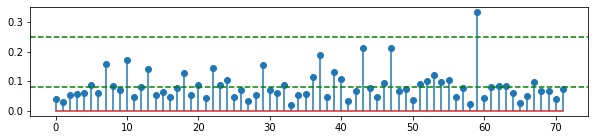

In [70]:
HHinfluence=HHresults.get_influence()
hat=HHinfluence.hat_matrix_diag
plt.figure(figsize=(10,2))
plt.stem(hat, use_line_collection=True)
plt.axhline(0.08,c='g',ls='--')
plt.axhline(0.25,c='g',ls='--')
plt.show()

In [71]:
hat.sum()/72

0.08333333333333331

- 60번째 데이터가 영향력관측값

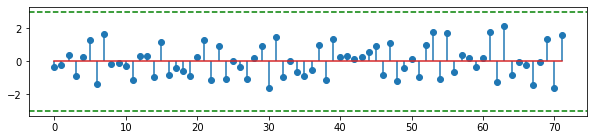

In [72]:
plt.figure(figsize=(10,2))
plt.stem(HHresults.resid_pearson,use_line_collection=True)
plt.axhline(3,c='g',ls='--')
plt.axhline(-3,c='g',ls='--')
plt.show()

- 이상치 없다고 판단

2) 영향력 관측값 제거 후 회귀

In [73]:
forHH=forHH.drop([forHH.index[59]])
HH_Y_sin=HH_Y_sin.drop([HH_Y_sin.index[59]])

In [74]:
forHH

,전년도승률,득점권WHIP_p,득점권타율_h,장타율_h,삼진/타수_h,삼진/이닝_p
0,0.472,2.187500,0.189435,0.338340,0.216352,7.017045
1,0.472,1.511458,0.262665,0.361869,0.210905,7.621635
2,0.468,2.115625,0.263969,0.372769,0.158817,5.156250
3,0.468,1.912757,0.259244,0.445988,0.161013,5.781250
4,0.430,1.049290,0.256818,0.413663,0.236801,7.062500
...,...,...,...,...,...,...
67,0.468,1.642857,0.215385,0.449817,0.209692,8.906250
68,0.430,1.998252,0.296160,0.413704,0.212935,8.913462
69,0.430,1.794872,0.314815,0.496041,0.158613,6.333333
70,0.535,1.269291,0.274310,0.428117,0.234600,6.792149


In [75]:
HH_Y_sin

0     1.519912
1     1.653745
2     1.623001
3     1.449595
4     1.587631
        ...   
67    1.449595
68    1.587631
69    1.736994
70    1.607198
71    2.043294
Name: result, Length: 71, dtype: float64

### 결론 : 최종 10개 팀에 대한 회귀식